# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from collections import Counter
from sklearn.utils import shuffle

%matplotlib inline


---
## Step 0: Load The Data

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

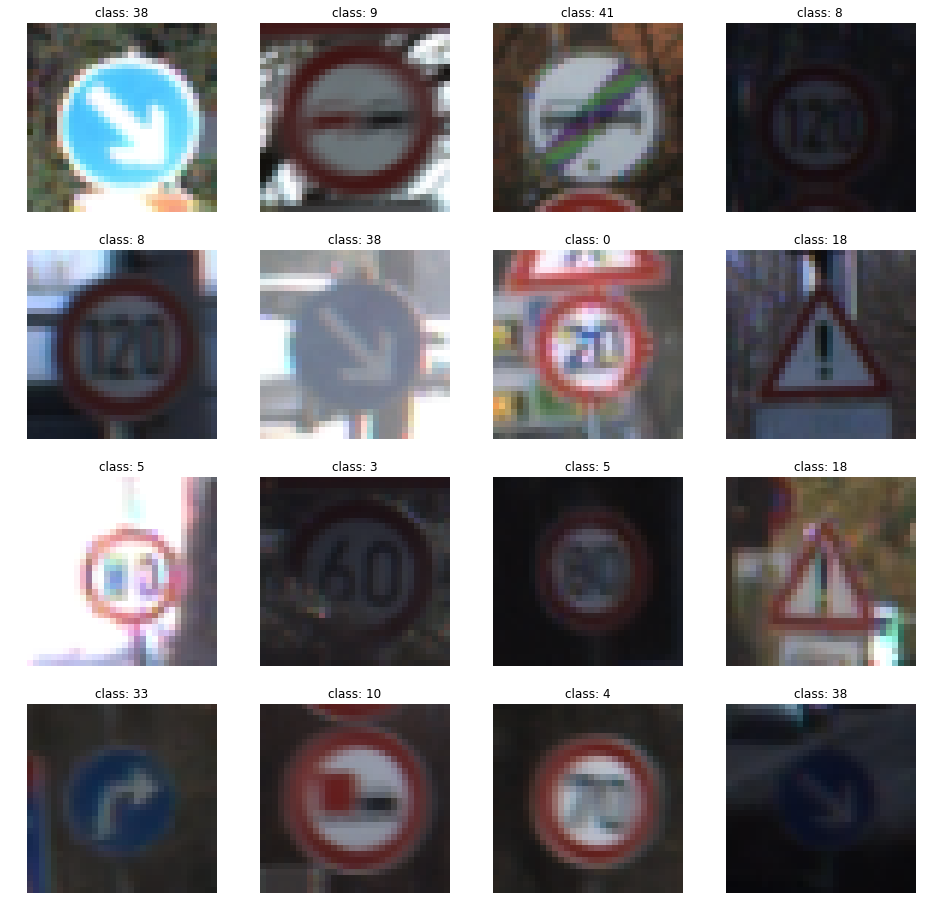

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# randomly show multiple, i.e. 16, images from the training dataset

num_row = 4
num_col = 4
num_img = num_row*num_col

np.random.seed(100)
random_picked_index = np.random.randint(len(X_train), size=num_img)

index_array = random_picked_index.reshape((num_row, num_col))

fig, axes = plt.subplots(num_row,num_col, figsize=(16, 16))

for row_idx in range(num_row):
    for col_idx in range(num_col):
        index = index_array[row_idx, col_idx]
        image = X_train[index]
        axes[row_idx, col_idx].axis('off')
        axes[row_idx, col_idx].imshow(image)
        axes[row_idx, col_idx].set_title('class: {}'.format(y_train[index]))
        

In [5]:
# this is the function to count the number of each traffic sign category.
def show_class_count_num(data, title_name):
    data_counter = Counter(data)

    class_list = []
    count_list = []

    for key, value in data_counter.items():
        class_list.append(key)
        count_list.append(value)

    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 22})
    plt.bar(class_list, count_list)
    plt.xlabel('Class Category')
    plt.ylabel('Counts')
    plt.title(title_name)
    plt.show()

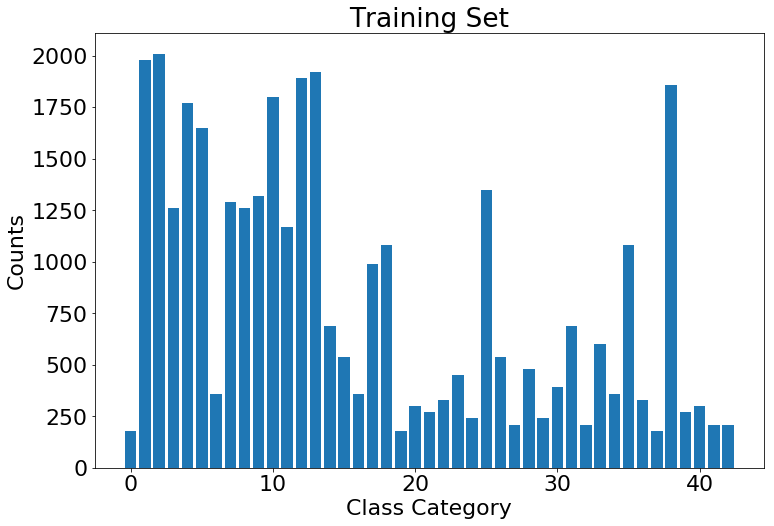

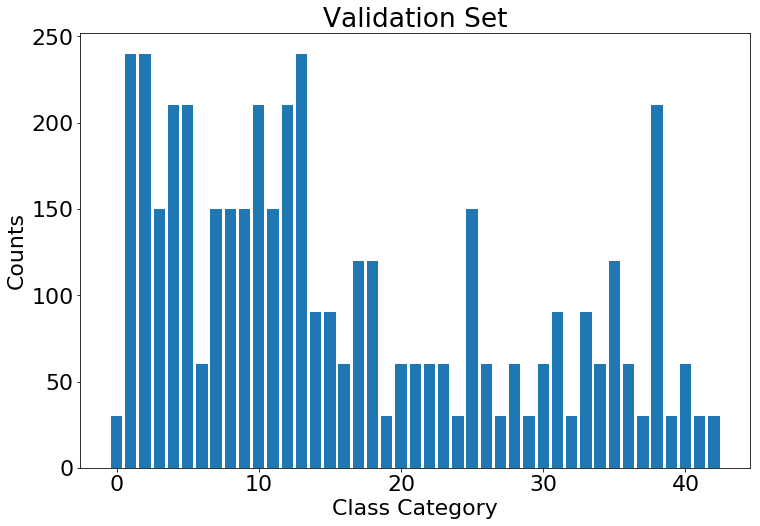

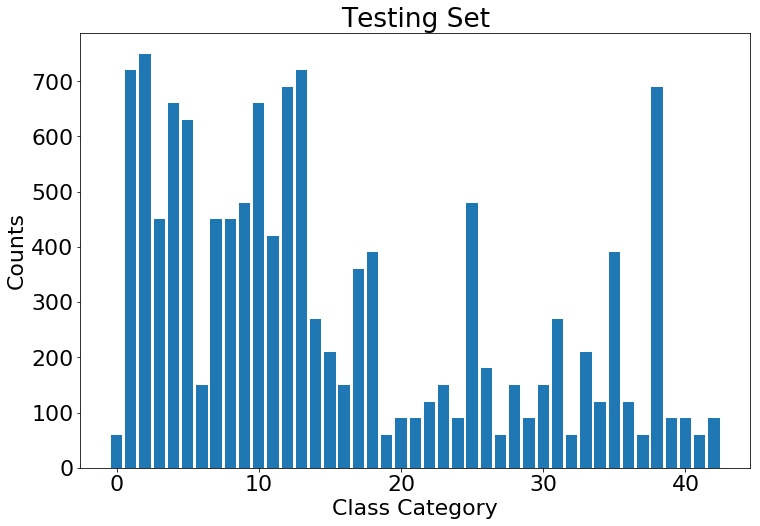

In [6]:
# plot the count of each sign in the training, validation and testing sets
show_class_count_num(y_train, 'Training Set')
show_class_count_num(y_valid, 'Validation Set')
show_class_count_num(y_test, 'Testing Set')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Convert to grayscale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
print('Training set Grayscale image shape:', X_train_gray.shape)

X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
print('Validation set Grayscale image shape:', X_valid_gray.shape)

X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
print('Testing set Grayscale image shape:', X_test_gray.shape)

Training set Grayscale image shape: (34799, 32, 32, 1)
Validation set Grayscale image shape: (4410, 32, 32, 1)
Testing set Grayscale image shape: (12630, 32, 32, 1)


In [8]:
## Normalize the train and test datasets to (-1,1)
X_train_normalized = (X_train_gray - 128)/128 
X_valid_normalized = (X_valid_gray - 128)/128 
X_test_normalized = (X_test_gray - 128)/128
print(np.mean(X_train_normalized))
print(np.mean(X_valid_normalized))
print(np.mean(X_test_normalized))

-0.354081335648
-0.347215411128
-0.358215153428


In [9]:
X_train = X_train_normalized
X_valid = X_valid_normalized
X_test = X_test_normalized

### Discussion

The submission describes the preprocessing techniques used and why these techniques were chosen.

### Answer:

The preprocessing process consists of the following steps:

- The color images in the input dataset has been converted into grayscale images. The color information in the traffic signal is not the key part to classify the traffic signs in this problem (of course, if we have to classify the traffic lights, e.g. red, yellow, green, this will be an important perspective). Therefore, transfering the color image can help to reduce the size of the input data, which will reduce the requirement on complicated models and also can reduce the training time.

- The input image data has been normalized so that the data has approximately mean zero and equal variance. For this project, a simple calculation, e.g. (pixel - 128)/ 128 is used to approximately normalize the image data. However, we can see that the mean value is not exactly zero (about -0.35), but is close to zero and the training, validation and testing dataset are similar to each other. The normalization will help to ensure different features have similar ranges, which will make the training process easier to converge under a given learning rate.

Other preprocessing methods are not utilized at this point. Another method, e.g. data augmentation, can also help to improve the performance.


### Model Architecture

The LeNet-5 implementation shown in the classroom at the end of the CNN lesson is used here as a starting point. The number of classes has been changed to 43 in this case.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [11]:
def LeNet_modified(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 512. Output = 256.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(256))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 256. Output = 128.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(128))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Activation.
    fc3    = tf.nn.relu(fc3)

    # Layer 6: Fully Connected. Input = 128. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

### Details of Model Architecture

The following is the model architecture for the original LeNet-5, which is defined in "LeNet(x)".

- 5x5 convolution (32x32x1 in, 28x28x6 out)
- ReLU
- 2x2 max pool (28x28x6 in, 14x14x6 out)
- 5x5 convolution (14x14x6 in, 10x10x16 out)
- ReLU
- 2x2 max pool (10x10x16 in, 5x5x16 out)
- Flatten layer (5x5x16 -> 400)
- Fully connected layer (400 in, 120 out)
- ReLU
- Dropout layer
- Fully connected layer (120 in, 84 out)
- ReLU
- Dropout layer
- Fully connected layer (84 in, 43 out)


When the original LeNet-5 is used, the model is under fitted using the given training data. In order to have a better testing accuracy, I have modified the model by adding an additional fully connected layer and also change the number of neurons in the fully connected layer. The following is the model architecture for the modified LeNet, which is defined in "LeNet_modified(x)"

- 5x5 convolution (32x32x1 in, 28x28x6 out)
- ReLU
- 2x2 max pool (28x28x6 in, 14x14x6 out)
- 5x5 convolution (14x14x6 in, 10x10x16 out)
- ReLU
- 2x2 max pool (10x10x16 in, 5x5x16 out)
- Flatten layer (5x5x16 -> 400)
- Fully connected layer (400 in, 512 out)
- ReLU
- Dropout layer
- Fully connected layer (512 in, 256 out)
- ReLU
- Dropout layer
- Fully connected layer (256 in, 128 out)
- ReLU
- Dropout layer
- Fully connected layer (128 in, 43 out)

In [12]:
epochs = 50
batch_size = 128
learning_rate = 0.001
model_save_path = 'trained_model.ckpt'

In [13]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units in Dropout layer
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### The following training codes are based on the resources in the classroom of CNN lesson and has been modified accordingly based on my specific needs.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#logits = LeNet(x)
logits = LeNet_modified(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Discussion
How the model was trained by discussing what optimizer was used, batch size, number of epochs and values for hyperparameters.


### Answer:

The Adam optimizer is used. The hyperparameters are used as follows:

- batch size: 128
- epochs: 50
- learning rate: 0.001
- mu: 0
- sigma: 0.1
- dropout keep probability: 0.7


In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Start Training Process ....")
    maximum_validation_acc = 0
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Epoch {}: Validation Accuracy = {:.4f}".format(i+1, validation_accuracy))
        if validation_accuracy>maximum_validation_acc:
            maximum_validation_acc = validation_accuracy
            saver.save(sess, model_save_path)
            print("Model saved")
#     saver.save(sess, './lenet')
#     print("Model saved")        

Start Training Process ....
Epoch 1: Validation Accuracy = 0.8268
Model saved
Epoch 2: Validation Accuracy = 0.8753
Model saved
Epoch 3: Validation Accuracy = 0.8912
Model saved
Epoch 4: Validation Accuracy = 0.8991
Model saved
Epoch 5: Validation Accuracy = 0.9127
Model saved
Epoch 6: Validation Accuracy = 0.9172
Model saved
Epoch 7: Validation Accuracy = 0.9202
Model saved
Epoch 8: Validation Accuracy = 0.9256
Model saved
Epoch 9: Validation Accuracy = 0.9143
Epoch 10: Validation Accuracy = 0.9100
Epoch 11: Validation Accuracy = 0.9204
Epoch 12: Validation Accuracy = 0.9147
Epoch 13: Validation Accuracy = 0.9186
Epoch 14: Validation Accuracy = 0.9154
Epoch 15: Validation Accuracy = 0.9193
Epoch 16: Validation Accuracy = 0.9243
Epoch 17: Validation Accuracy = 0.9102
Epoch 18: Validation Accuracy = 0.9129
Epoch 19: Validation Accuracy = 0.9347
Model saved
Epoch 20: Validation Accuracy = 0.9184
Epoch 21: Validation Accuracy = 0.9308
Epoch 22: Validation Accuracy = 0.9082
Epoch 23: Valid

In [17]:
# Now (drumroll) evaluate the accuracy of the model on the test dataset

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, model_save_path)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.4f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from trained_model.ckpt
Test Set Accuracy = 0.9327


### Discussion

Describes the approach to finding a solution. Accuracy on the validation set is 0.93 or greater.

### Answer

The testing accuracy is 93.27%

At the begining of the process to find the solution, I have tried the original model architecture of LeNet-5, which I only changed the number of outputs. But I found that the validation accuracy can only reach around 93%, which made the best testing accuracy around 91~92%. In order to improve the performance, I have modified the model architecture by adding one additional fully connected layer and also using larger size of fully connected layer. After using the modified model, I have got the validation accuracy larger then 95% after 50 epochs. The testing accuaracy is 93.27%. 

In order to get the solution, I also tried to adjust the hyper parameters in order to find a good performance for the trained model, for example, the learning rate and batch size, etc.

Furthermore, in order to reduce the overfitting, during the training process, I saved the model only when the validation accuracy is improved. This is the early stop method to ensure the model is not overfitted.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
from PIL import Image

image_files  = ['new-found-traffic-signs/' + image_file for image_file in os.listdir('new-found-traffic-signs') if image_file.endswith('.png')]
labels = [int(image_file[:-4]) for image_file in os.listdir('new-found-traffic-signs') if image_file.endswith('.png')]
print("figure paths: {}".format(image_files))
print("labels: {}".format(labels))

figure paths: ['new-found-traffic-signs/1.png', 'new-found-traffic-signs/10.png', 'new-found-traffic-signs/9.png', 'new-found-traffic-signs/23.png', 'new-found-traffic-signs/30.png', 'new-found-traffic-signs/3.png', 'new-found-traffic-signs/28.png', 'new-found-traffic-signs/36.png']
labels: [1, 10, 9, 23, 30, 3, 28, 36]


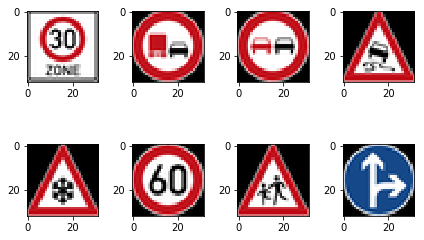

In [19]:
plt.rcParams.update({'font.size': 10})
images = []
for image_file in image_files:
    image = Image.open(image_file)
    image = image.convert('RGB')
    image = image.resize((32, 32), Image.ANTIALIAS)
    image = np.array(list(image.getdata()), dtype='uint8')
    image = np.reshape(image, (32, 32, 3))

    images.append(image)

images = np.array(images, dtype='uint8')
for i, image in enumerate(images):
    plt.subplot(2, 4, i+1)
    plt.imshow(image)

plt.tight_layout()
plt.show()

In [20]:
images = np.asarray(images)
images_gray = np.sum(images/3, axis=3, keepdims=True)
images_normalized = (images_gray - 128)/128 

print(images_normalized.shape)

(8, 32, 32, 1)


### Discussion

Discussion is made as to particular qualities of the images or traffic signs in the images that are of interest, such as whether they would be difficult for the model to classify.

### Answer:

The images used for testing are obtained from https://routetogermany.com/drivingingermany/road-signs. These traffic signs are not different from photos which are taken from real world scenarios. There are no background information in these images. In this case, it should be easier for classification. However, our model is trained based on the real world images with other background information and the traffic signs in training set are not filled into entire image. There are difference between these testing images and the used training images.

Some images in our testing images may be difficult to be classified, for example, the "'new-found-traffic-signs/1.png'", although it is a speed limit sign, it has a characters "zone" in this image, this is different from most of the samples in our training data set.

### Predict the Sign Type for Each Image

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, model_save_path)
    my_accuracy = evaluate(images_normalized, labels)
    print("Test Set Accuracy = {:.4f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from trained_model.ckpt
Test Set Accuracy = 0.7500


### Discussion

The performance on the new images is compared to the accuracy results of the test set.

#### Answer:

The trained model have predicted the new traffic signs with 75% accuracy (correctly predict 6 out of 8 images), which is less than the 93.27% testing accuracy. This is reasonable due to the small testing dataset and also some difference existing between these testing images and trainging images.

### Analyze Performance

INFO:tensorflow:Restoring parameters from trained_model.ckpt


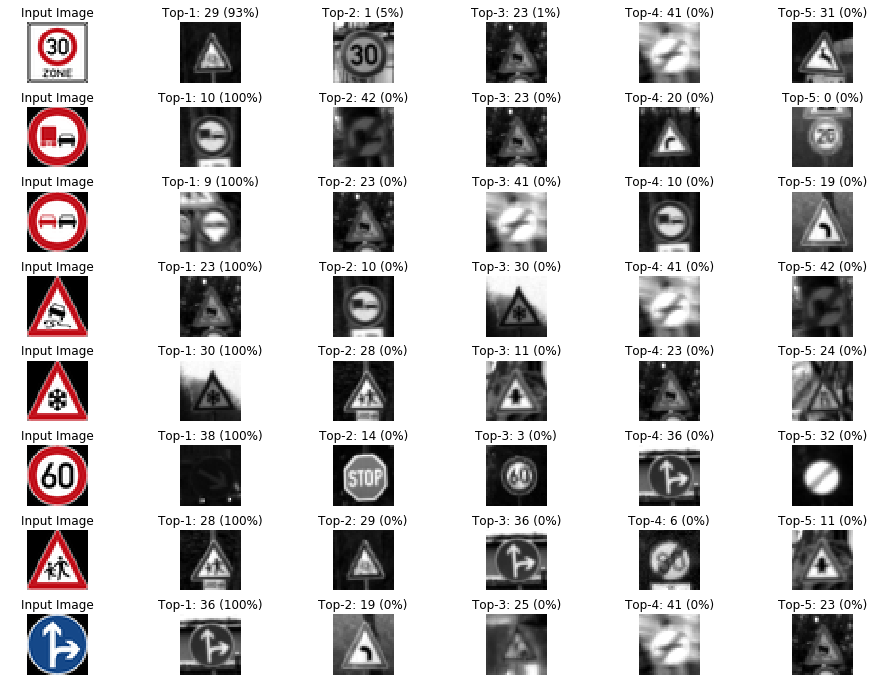

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

given_k = 5

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=given_k)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, model_save_path)
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: images_normalized, keep_prob: 1.0})
    
    fig, axes = plt.subplots(len(images),given_k+1, figsize=(16, 12))
    fig.subplots_adjust(hspace = .4)
    
    for idx, image in enumerate(images):
        axes[idx, 0].axis('off')
        axes[idx, 0].imshow(image)
        axes[idx, 0].set_title('Input Image')
        for k_idx in range(given_k):
            prediction = my_top_k[1][idx][k_idx]
            index = np.argwhere(y_train == prediction)[0]
            axes[idx, k_idx+1].axis('off')
            axes[idx, k_idx+1].imshow(X_train[index].squeeze(), cmap='gray')
            axes[idx, k_idx+1].set_title('Top-{}: {} ({:.0f}%)'.format(k_idx+1, prediction, 100*my_top_k[0][idx][k_idx]))
            

### Discussion

Discusses how certain or uncertain the model is of its predictions

### Answer

The model is somehow almost 100% certain of six signs I gave it, only the first one has 93% certain. However, this model misclassified the first and sixth images, both of them are speed limit traffic signs. It is reasonable that the first image is misclassfied because this traffic sign is a speed limit but with some characters on that. This may be very few in the training data set. For the first and sixth images, the model has predicted them to class 1 and 38 to class 29 and 3 with almost 100% certain. However, we can see that the true classes are also included in the top 5 selections, for example the 2nd predcition for the first image and the 3rd prediction for the sixth image. This means that the model can capture some underlying patterns in thes samples but the model still needs to be improved for generalization and better accuracy.